# Unsupervised NLP

While supervised NLP allows us to transform text to digits and quantify the text, it does not allow us to gain an understanding of the text meaning.  We have the ability to count word frequency, sentence length, and the like, however, we can't tell that 'queen' is more similar to 'lady' than 'car'.  Also, we wouldn't be able to tell that synonyms are related instead of completely separate words.  

Enter unsupervised NLP. The main goal of unsupervised NLP is to train a model to understand, at a semantic level, the corpus it has been trained on.  Instead of explicitly coding the rules of a language or corpus, we allow the model to learn the semantic rules of that text. The main method is **term frequency - inverse document frequency**, or **_tf-idf_** for short.

# TF-IDF

Term frequency - inverse document frequency is a method which weights the value of a particular lemma based on how frequently it appears in sentence and document.  Effectively, it will measure how important a word is to a sentence and the document as a whole.  Let's construct it's building blocks _term frequency_ and _inverse document frequency_.


## Sentences to vectors
We first need to parse text into a numerical vector form, similar to what we did in the supervised NLP exercise.  Consider the following sentences: 

1. "The best Monty Python sketch is the one about the dead parrot,  I laughed so hard."
2. "I laugh when I think about Python's Ministry of Silly Walks sketch, it is funny, funny, funny, the best!"
3. "Chocolate is the best ice cream dessert topping, with a great taste."
4. "The Lumberjack Song is the funniest Monty Python bit: I can't think of it without laughing."
5. "I would rather put strawberries on my ice cream for dessert, they have the best taste."
6. "The taste of caramel is a fantastic accompaniment to tasty mint ice cream."

Obviously, there are two main themes, comedy and ice cream.  How will we quantify these?

If we parse these, removing stop words, reduce to lemmas, and discard words that only appear once, we can create the following term-document matrix.  Where by the columns represent each sentence in the "document" (loosely, the block of text evaluated, here a single sentence) and each row represents a term which passes through our decision gate.

|    term   | 1 | 2 | 3 | 4 | 5 | 6 |
|-----------|---|---|---|---|---|---|
| Monty     | 1 | 0 | 0 | 1 | 0 | 0 |
| Python    | 1 | 1 | 0 | 1 | 0 | 0 |
| sketch    | 1 | 1 | 0 | 0 | 0 | 0 |
| laugh     | 1 | 1 | 0 | 1 | 0 | 0 |
| funny     | 0 | 3 | 0 | 1 | 0 | 0 |
| best      | 1 | 1 | 1 | 0 | 1 | 0 |
| ice cream | 0 | 0 | 1 | 0 | 1 | 1 |
| dessert   | 0 | 0 | 1 | 0 | 1 | 0 |
| taste     | 0 | 0 | 1 | 0 | 1 | 2 |

The main take-aways from this table are that we have identified and quantified words that are important to each them; "funny" for comedy, "taste" for ice cream.  We also note that "best" is used indescriminantly across both each theme and the corpus.  We can reduce the dimensionality of this matrix by aggregating across each document and the collection (corpus) as a whole.


## Document and collection frequency
'Document frequency' counts how many documents (sentences, in this case) a word appears in.  'Collection frequency' counts how often a word appears, total, over the full collection (all sentences).  Let's calculate the df and cf for our sentence set:

|     term  |df | cf| 
|-----------|---|---|
| Monty     | 2 | 2 | 
| Python    | 3 | 3 | 
| sketch    | 2 | 2 | 
| laugh     | 3 | 3 | 
| funny     | 2 | 4 | 
| best      | 4 | 4 | 
| ice cream | 3 | 3 | 
| dessert   | 2 | 2 | 
| taste     | 3 | 4 | 

We have two different counts for each "important" lemma.  However, recall that high total occurances, such as "best", actually provide less information than words with fewer occurances, like "funny" or "taste".  These less common words have more specific context and will be more useful, so let's create a metric which follows this logic.


## Inverse Document Frequency

We will calculate the inverse document frequency (idf) as:

$$ idf_t = \log \dfrac N{df_t} $$

That is the log (base 2) of the ratio between the total number of documents (N) and the document frequency of each term ($df_t$).  The $idf_t$ weights represent which terms are most important across the entire collection of documents.

|  term    |df | N | idf |
|-----------|---|---|---|
| Monty     | 2 | 6 | 1.585 |
| Python    | 3 | 6 | 1 |
| sketch    | 2 | 6 | 1.585 |
| laugh     | 3 | 6 | 1 |
| funny     | 2 | 6 | 1.585 |
| best      | 4 | 6 | .585 |
| ice cream | 3 | 6 | 1 |
| dessert   | 2 | 6 | 1.585 |
| taste     | 3 | 6 | 1 |


## TF-IDF

We can then multiply $idf_t$ by $tf_t,d$, the term frequency for each document (sentence, in this case) to arrive at the $tf-idf$.

$$ tf-idf_t,d = (tf_t,d)(idf_t) $$

|   term    | 1 | 2 | 3 | 4 | 5 | 6 |
|-----------|---|---|---|---|---|---|
| Monty     | 1.585 | 0 | 0 | 1.585 | 0 | 0 |
| Python    | 1 | 1 | 0 | 1 | 0 | 0 |
| sketch    | 1.585| 1.585 | 0 | 0 | 0 | 0 |
| laugh     | 1 | 1 | 0 |  1 | 0 | 0 |
| funny     | 0 | 4.755 | 0 | 1.585 | 0 | 0 |
| best      | .585 | .585 | .585 | 0 | .585 | 0 |
| ice cream | 0 | 0 | 1 | 0 | 1 | 1 |
| dessert   | 0 | 0 | 1.585 | 0 | 1.585 | 0 |
| taste     | 0 | 0 | 1 | 0 | 1 | 2 |

Now we have a feature which incorporates both sentence-level and whole text-level information. From the table above, we note that, in sentence 2, "funny" has the highest $tf-idf$ score of the entire text.  We also see that while "best" is present in many sentences, it has a relatively low $tf-idf$ score because it is not very specific.


## Considerations for $tf-idf$ Models

* Which stop words to include or exclude
* Should we use phrases ('Monty Python' instead of 'Monty' and 'Python') as terms
* The threshold for infrequent words: Here, we excluded words that only occurred once.  In longer documents, it may be a good idea to set a higher threshold.
* How many terms to keep.  We kept all the terms that fit our criteria (not a stop word, occurred more than once), but for bigger document collections or longer documents, this may create unfeasibly long vectors.  We may want to decide to only keep the 10,000 words with the highest collection frequency scores, for example.

# Vector Space Model

This vector represenation of the text is called a Vector Space Model.  We can use this representation to compute the similarity between the trained sentences (or blocks of text) and a new sentence -- this is often used by search engines to match a query to possible results.

To compute similarity, one has to first transform the new text into the trained vector space.  Then you calculated the cosine of the angle between the trained vectors and the new vector.  If the vectors are identical, then the angle is 0° and the cosine is 1.  Conversely, if the vectors are completely unrelated, the angle between them will be 90° and the cosine will be 0.  The cosine of the angle between the vectors represents a similarity score.


# Latent Semantic Analysis

While VSM is cool and useful, it struggles with synonyms and polysemy ("I need a break" vs "I break things").  It also has trouble with very large documents.  

The solution is to reduce the dimensionality of the VSM with **Latent Semantic Analysis**, a form of PCA.  Specifically, the dimension reduction technique is called Singular Value Decomposition (SVD).  This differs from PCA in that the variables are not mean-centered and thus preserves the sparsity present within the VSM.  The output of SVD on the $tf-idf$ matrix is a cluster of terms that presumably reflect a topic.  Each sentence would then recieve a score for each topic, with higher scores indicating that it is more relevant to the topic.


# Exercise

Ok, now let's try performing the $tf-idf$ and LSA on *Emma* by Jane Austen.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')  # Need this to process the data
from nltk.corpus import gutenberg
import re

import scipy

from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mkfrancsis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Reading the data in by paragraphs, thus our "document" will be 
# full paragraphs, not just single sentences
emma = gutenberg.paras('austen-emma.txt')

emma_paras = []
for paragraph in emma:
    para = paragraph[0]
    
    # Cleaning the double dashes from the text
    para = [re.sub(r'--', '', word) for word in para]
    emma_paras.append(' '.join(para))
    
print(emma_paras[:4])

['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


## tf-idf in sklearn

SKlearn has a $tf-idf$ method available to use, along with a lengthy list of stop words.

In [11]:
# Need this for future comparisons to vectorized data
X_train, X_test = train_test_split(emma_paras, 
                                   test_size=0.4, 
                                   random_state=0)

# Hyperparameter decisions
# max_df = 0.5, drops words that appear in more than half of all documents
# min_df = 2, drops words that appear less than twice
# use_idf = True, uses inverse document weighting
# norm = u'l2', correction factor for document length
# smooth_idf = True, Adds 1 to all document frequencies, eliminates div0 errors
vectorizer = TfidfVectorizer(max_df = 0.5, 
                             min_df = 2, 
                             stop_words = 'english', 
                             lowercase = True, 
                             use_idf = True, 
                             norm = u'l2', 
                             smooth_idf = True)

emma_paras_tfidf = vectorizer.fit_transform(emma_paras)
print(f'Number of features {emma_paras_tfidf.get_shape()[1]}')

Number of features 1948


In [16]:
X_train_tfidf, X_test_tfidf = train_test_split(emma_paras_tfidf, 
                                               test_size = 0.4, 
                                               random_state = 0)

# Reshape the output to human readable format
X_train_tfidf_csr = X_train_tfidf.tocsr()

# Number of paragraphs
n = X_train_tfidf_csr.shape[0]

# Creating a list of dictionaries to store the paragraphs in
tfidf_bypara = [{} for _ in range(0,n)]

# List of features
terms = vectorizer.get_feature_names()

for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]
    
print('Original sentence: ', X_train[5])
print('\ntf-idf vector: ', tfidf_bypara[5])

Original sentence:  A very few minutes more , however , completed the present trial .

tf-idf vector:  {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


Note, that because tf-idf is log base 2, and the $\log_2(1) = 0$, that a score of 0 indicates that the word was present once in that sentence.

# SVD dimensionality reduction

Our model has as shape of (2371, 1948).  We should definitely do some dimensionality reduction using SVD.  Remember that performing SVD on the tf-idf vectors is called Latent Semantic Analysis (LSA).

In [20]:
# Instantiating the SVD to create a reduced sample space of (n, 130)
svd = TruncatedSVD(n_components = 130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run the SVD on the training data
X_train_lsa = lsa.fit_transform(X_train_tfidf)

explained_var = svd.explained_variance_ratio_
total_var = explained_var.sum()

print("Percent of variance captured by all components: ", round(total_var * 100, 2))

Percent of variance captured by all components:  45.21


In [31]:
# Looking at the first 5 topics from the SVD
para_by_component = pd.DataFrame(X_train_lsa, index=X_train)

for i in range(5):
    print(f'\nComponent {i}')
    print(para_by_component.loc[:, i].sort_values(ascending=False)[:10])


Component 0
" Oh !    0.999289
" Oh !    0.999289
" Oh !    0.999289
" Oh !    0.999289
" Oh !    0.999289
" Oh !    0.999289
" Oh !    0.999289
" Oh !    0.999289
" Oh !    0.999289
" Oh !    0.999289
Name: 0, dtype: float64

Component 1
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

These groupings, or topics, seem to be well defined. Topics 0 and 3 contain exclamation text. Topic 2 is chapter headings. Topic 1 involves seemingly critical dialogue about or directed toward Emma.  Topic 4 involves actions by or related to Emma.


# Sentence similarity

We can also evaluate how similar sentences are to one another.

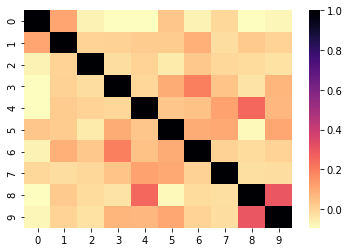

Sentence Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved

In [38]:
# Computing similarity between the LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)

# Only considering the first 10 sentences
sim_matrix = pd.DataFrame(similarity, index=X_train).iloc[0:10, 0:10]

ax = sns.heatmap(sim_matrix, 
                 yticklabels=range(10), 
                 cmap='magma_r')
plt.show()

# Creating a legend for the plot
print('Sentence Key:')
for i in range(10):
    print(i, sim_matrix.index[i])

The first 10 sentences don't have much in common with each other, except sentences 8 and 9 which appear to describe affable relations between people.

# Drill 1: Test set

Transform the test set using the trained LSA model and evaluate.

In [40]:
# Transforming the test data
X_test_lsa = lsa.transform(X_test_tfidf)

# Looking at the first 5 topics from the SVD
para_by_component = pd.DataFrame(X_test_lsa, index=X_test)

for i in range(5):
    print(f'\nComponent {i}')
    print(para_by_component.loc[:, i].sort_values(ascending=False)[:10])


Component 0
" Oh !"        0.999289
" Oh !         0.999289
" Me ! oh !    0.999289
" Oh !         0.999289
" Oh no !      0.999289
" Oh !         0.999289
" Oh !         0.999289
" Oh !"        0.999289
" Oh !         0.999289
" Oh !         0.999289
Name: 0, dtype: float64

Component 1
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                                                                                                                                                                                                                                                                                          0.677289
Frank turned instantly to Emma , to claim her former promise ; and boasted himself an engaged man , which his father looked his most perfect approbation of  and it then appeared that Mrs . Weston was wan

The test sentences seem to match the same type of sentences we saw from the training data.  That's good news!

# Drill 2: Tweaking the tf-idf model

Play with the tf-idf model and describe the resulting changes.

In [61]:
# Removing the stop word list
# Increasing the max_df to 0.7
# Increasing min_df to 3
vectorizer2 = TfidfVectorizer(max_df = 0.7,
                             min_df = 3, 
                             stop_words = None, 
                             lowercase = True, 
                             use_idf = True, 
                             norm = u'l2', 
                             smooth_idf = True)

emma_paras_tfidf2 = vectorizer2.fit_transform(emma_paras)
print(f'Number of features {emma_paras_tfidf2.get_shape()[1]}')

Number of features 1575


Decreased the number of original features by ~400.

In [62]:
X_train_tfidf2, X_test_tfidf2 = train_test_split(emma_paras_tfidf2, 
                                               test_size = 0.4, 
                                               random_state = 0)

# Reshape the output to human readable format
X_train_tfidf2_csr = X_train_tfidf2.tocsr()

# Number of paragraphs
n = X_train_tfidf2_csr.shape[0]

# Creating a list of dictionaries to store the paragraphs in
tfidf2_bypara = [{} for _ in range(0,n)]

# List of features
terms = vectorizer.get_feature_names()

for i, j in zip(*X_train_tfidf2_csr.nonzero()):
    tfidf2_bypara[i][terms[j]] = X_train_tfidf2_csr[i, j]
    
print('Original sentence: ', X_train[5])
print('\ntf-idf vector: ', tfidf2_bypara[5])

Original sentence:  A very few minutes more , however , completed the present trial .

tf-idf vector:  {'ideas': 0.47569934416254367, 'lose': 0.46814294994025785, 'fell': 0.42643765695823255, 'importance': 0.3288719371916576, 'does': 0.4221770789966193, 'respectable': 0.24059697181427692, 'questioned': 0.1686004067729988}


Many more words are included as vectors now.

In [72]:
# Instantiating the SVD to create a reduced sample space of (n, 130)
svd = TruncatedSVD(n_components = 130)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run the SVD on the training data
X_train2_lsa = lsa.fit_transform(X_train_tfidf2)

explained_var = svd.explained_variance_ratio_
total_var = explained_var.sum()

print("Percent of variance captured by all components: ", round(total_var * 100, 2))


Percent of variance captured by all components:  53.35


In [73]:
# Looking at the first 5 topics from the SVD
para_by_component = pd.DataFrame(X_train2_lsa, index=X_train)

for i in range(5):
    print(f'\nComponent {i}')
    print(para_by_component.loc[:, i].sort_values(ascending=False)[:10])


Component 0
Mrs . Weston was acting no part , feigning no feelings in all that she said to him in favour of the event . She had been extremely surprized , never more so , than when Emma first opened the affair to her ; but she saw in it only increase of happiness to all , and had no scruple in urging him to the utmost . She had such a regard for Mr . Knightley , as to think he deserved even her dearest Emma ; and it was in every respect so proper , suitable , and unexceptionable a connexion , and in one respect , one point of the highest importance , so peculiarly eligible , so singularly fortunate , that now it seemed as if Emma could not safely have attached herself to any other creature , and that she had herself been the stupidest of beings in not having thought of it , and wished it long ago . How very few of those men in a rank of life to address Emma would have renounced their own home for Hartfield !                                                                              

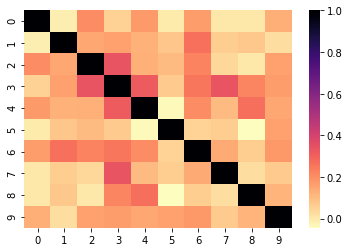

Sentence Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved

In [74]:
# Computing similarity between the LSA components
similarity = np.asarray(np.asmatrix(X_train2_lsa) * np.asmatrix(X_train2_lsa).T)

# Only considering the first 10 sentences
sim_matrix = pd.DataFrame(similarity, index=X_train).iloc[0:10, 0:10]

ax = sns.heatmap(sim_matrix, 
                 yticklabels=range(10), 
                 cmap='magma_r')
plt.show()

# Creating a legend for the plot
print('Sentence Key:')
for i in range(10):
    print(i, sim_matrix.index[i])